<a href="https://colab.research.google.com/github/sbdrchauhan/python-ic/blob/main/pandas_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# lets import pandas 
import pandas as pd

In [2]:
%matplotlib inline
# makes plot in Ipython inplace

In [3]:
# lets import matplotlib
import matplotlib.pyplot as plt

In [16]:
# to get the dataset from the google drive saved folders (personal gmail drive)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
ted = pd.read_csv('drive/My Drive/Data/ted.csv')
# I have created Data folder inside my google drive and inside Data folder
# there is ted.csv file/dataset 

In [6]:
# we first look at head of dataset  (meaning first five rows from the dataset)
# but if we say head(10) it will show 10 rows
# also we have tail() method which shows last 5 rows of the dataset
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [7]:
# after observing the dataset, I see that each row is each ted talk given by speaker
# and each columns tells about talks, like how many views, comments, who the speaker
# what is the title, etc

# another useful attribute to look at is shape, which tells how many rows and columns
ted.shape

# important: method has parenthesis like head(), while attributes don't like shape

(2550, 17)

In [8]:
# lets look at data types of each column
ted.dtypes

comments               int64
description           object
duration               int64
event                 object
film_date              int64
languages              int64
main_speaker          object
name                  object
num_speaker            int64
published_date         int64
ratings               object
related_talks         object
speaker_occupation    object
tags                  object
title                 object
url                   object
views                  int64
dtype: object

In [9]:
# we need to check that if any column has the missing values
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

In [10]:
# so we can see that there are 6 instances of speaker_occupation where data is missing

**Which talk provoke the most online discussion?**

One way of defining the most online discussion talk as having more comments for less views.

In [11]:
# lets make one column to see this
# so one which has less views per comment will be the one having most online discussion
# this will mean there are less views needed for comments
ted['views_per_comment'] = ted.views/ted.comments
ted.views_per_comment.sort_values().head()

744    450.531587
803    651.739808
96     683.134291
694    703.886818
954    735.525682
Name: views_per_comment, dtype: float64

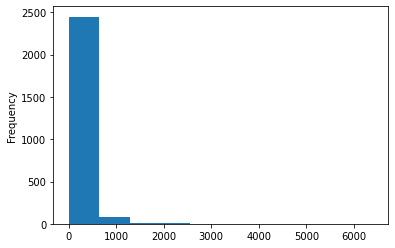

In [12]:
# lets try to see the comments in visually
ted.comments.plot(kind='hist')

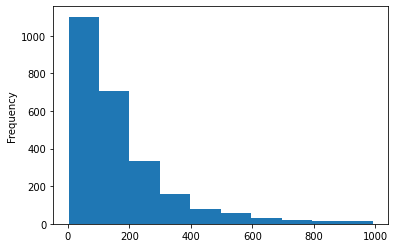

In [13]:
# we can see that most of the comments falls below 1000 so we can scale the graph
# to see that area more
ted[ted.comments<1000].comments.plot(kind='hist')

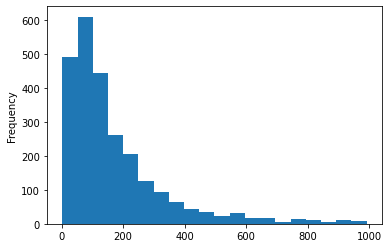

In [14]:
# further if we change the bin number to 20 (default=10)
ted[ted.comments<1000].comments.plot(kind='hist', bins=20)

In [15]:
# so we can see that most of the comments are 100-150 for each talks and few talks 
# has larger comments, above 1000 also but we cut that off.
# On average, each talk gets 100-150 comments

**Plot the number of talks that took place each year**

In [17]:
# For this task we need to look at film_date column. The column time format is in Unix.
# So we need to change the unix to pandas date_time() object, first
# lets make new column
ted['film_datetime'] = pd.to_datetime(ted.film_date, unit='s')

In [19]:
# lets check if we were successful doing above task
ted[['event','film_datetime']].sample(5)

,event,film_datetime
679,TEDIndia 2009,2009-11-06 10:26:00
305,EG 2007,2007-12-12 00:00:00
1402,TEDSalon London Fall 2012,2012-11-07 00:00:00
2055,TEDxUF,2015-03-21 00:00:00
343,Taste3 2008,2008-07-18 00:00:00


In [20]:
# from looking above we can see the date on both column matches at least year
# so we can be sure that film_datetime is the column we looking now

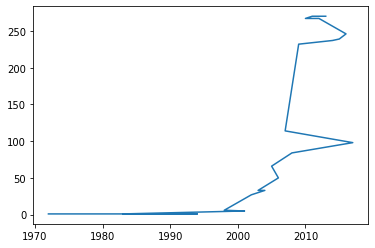

In [24]:
ted.film_datetime.dt.year.value_counts().plot()

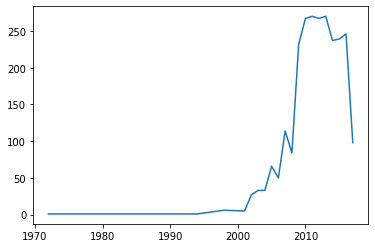

In [27]:
# we have to sort the index before plotting, else our programming language is not
# so smart enough to know this subtlety, because we know that
# while plotting we first look at index (x-axis) and find y axis match
ted.film_datetime.dt.year.value_counts().sort_index().plot()

**What were the "best" events in TED history to attend?**

In [28]:
# lets see the event column with their number of talks
ted.event.value_counts().head()

TED2014    84
TED2009    83
TED2013    77
TED2016    77
TED2015    75
Name: event, dtype: int64

In [30]:
ted.groupby('event').views.agg(['count','mean','sum']).sort_values('sum').tail()
# to use groupby
# for each "event" I want to do some agg function to some column

,count,mean,sum
event,,,
TED2006,45,3.274345e+06,147345533
TED2015,75,2.011017e+06,150826305
TEDGlobal 2013,66,2.584163e+06,170554736
TED2014,84,2.072874e+06,174121423
TED2013,77,2.302700e+06,177307937


In [31]:
# from above table we can see TED2013 has largest views. Must be a good event

**Lets look at the ratings column**

In [32]:
ted.ratings.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings, dtype: object

In [33]:
# we can see each row has a list of dictionaries

In [35]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

In [36]:
# to make the real python list of dictionaries
import ast
ted['ratings_list'] = ted.ratings.apply(lambda x: ast.literal_eval(x))

In [37]:
ted.ratings_list.head()

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
3    [{'id': 3, 'name': 'Courageous', 'count': 760}...
4    [{'id': 9, 'name': 'Ingenious', 'count': 3202}...
Name: ratings_list, dtype: object

In [38]:
ted.ratings_list[0]

[{'count': 19645, 'id': 7, 'name': 'Funny'},
 {'count': 4573, 'id': 1, 'name': 'Beautiful'},
 {'count': 6073, 'id': 9, 'name': 'Ingenious'},
 {'count': 3253, 'id': 3, 'name': 'Courageous'},
 {'count': 387, 'id': 11, 'name': 'Longwinded'},
 {'count': 242, 'id': 2, 'name': 'Confusing'},
 {'count': 7346, 'id': 8, 'name': 'Informative'},
 {'count': 10581, 'id': 22, 'name': 'Fascinating'},
 {'count': 300, 'id': 21, 'name': 'Unconvincing'},
 {'count': 10704, 'id': 24, 'name': 'Persuasive'},
 {'count': 4439, 'id': 23, 'name': 'Jaw-dropping'},
 {'count': 1174, 'id': 25, 'name': 'OK'},
 {'count': 209, 'id': 26, 'name': 'Obnoxious'},
 {'count': 24924, 'id': 10, 'name': 'Inspiring'}]

**Count the total number of ratings received by each talk**

In [39]:
# we need to retrieve the count for each talk and add them to find total number of ratings
# lets define such function and apply this to whole column
def get_num_ratings(list_of_dicts):
  num = 0
  for d in list_of_dicts:
    num += d['count']
  return num

In [40]:
# lets check above function with just one row ratings data
get_num_ratings(ted.ratings_list[0])

93850

In [41]:
# that number sees right if we just add plain numbers by looking above cells

In [42]:
# lets make one column that keeps records of counts for each talk
ted['num_ratings'] = ted.ratings_list.apply(get_num_ratings)

In [43]:
# lets see it
ted.num_ratings.head()

0    93850
1     2936
2     2824
3     3728
4    25620
Name: num_ratings, dtype: int64